In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import utils.sulfur.constant as const

from utils.TimeCorrelationCalculator import TimeCorrelationCalculator
from utils.TimeCorrelationViewer import TimeCorrelationViewer
from utils.monte_carlo_resampling_operator import MonteCarloResamplingOperator

In [2]:
%%time

animal_name = const.ANIMAL_NAMES[0]
context_name = 'A1postES'

calculator = TimeCorrelationCalculator(animal_name, context_name)
result = calculator.calc(start=90, end=130)
result[0]
#TimeCorrelationViewer(*result).draw(title='A1postES 0-40s in %s' % animal_name)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


CPU times: user 2min 24s, sys: 464 ms, total: 2min 24s
Wall time: 2min 24s


In [3]:
shuffle_calculator = result[0]
df_index = list(range(len(shuffle_calculator.shuffle_dfs)))
df_columns = list(range(len(shuffle_calculator.shuffle_dfs[0].columns) ** 2))
df = pd.DataFrame(index=df_index, columns=df_columns)
df

,0,1,2,3,4,5,6,7,8,9,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
for index, shuffle_df in enumerate(shuffle_calculator.shuffle_dfs):
    df.iloc[index, :] = shuffle_df.to_numpy().ravel()
    
df

,0,1,2,3,4,5,6,7,8,9,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
0,0.458594,0.032453,0.01059,-0.007414,0.003993,0.008751,-0.011563,-0.00046,0.045385,0.05519,...,0.033509,0.050196,0.017969,0.018877,0.008631,-0.006068,0.001296,0.055269,-0.002544,0.389061
1,0.404274,-0.008215,0.027059,0.001743,-0.002576,0.007373,0.038686,-0.009489,0.009157,0.001708,...,-0.005329,0.003209,0.006794,0.058817,0.006391,0.00021,-0.00284,0.009628,-0.005926,0.375453
2,0.528948,-0.011788,-0.005676,0.020926,0.008839,-0.003073,0.001828,0.006787,-0.013957,0.03281,...,-0.010722,0.042147,-0.002941,0.001629,0.003471,-0.004829,-0.006906,0.001994,-0.007109,0.414771
3,0.462274,-0.009839,-0.003934,0.002901,-0.005682,-0.008414,0.000956,0.052705,0.009378,0.001365,...,0.007775,0.014885,0.015966,0.020283,-0.007065,0.002828,-0.018252,0.083271,0.034242,0.449276
4,0.500025,-0.012914,0.007458,0.01211,0.000215,-0.011554,0.004245,-0.001556,0.006531,0.034704,...,0.057682,0.114311,0.140552,0.129995,-0.013159,0.01338,0.041455,0.043738,0.047529,0.504424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.527266,-0.001867,0.001579,0.02046,0.003802,0.017065,-0.013596,-0.008469,-0.01265,-0.007092,...,0.005009,-0.009737,0.04683,-0.005396,0.000762,0.009419,-0.005363,-0.010824,0.011684,0.357614
996,0.423315,-0.013262,-0.010261,-0.000302,0.041956,0.019657,0.012845,0.003866,0.012619,0.005567,...,0.002115,0.002815,0.045291,0.024229,-0.000658,-0.005949,-0.013537,0.042078,0.010967,0.396951
997,0.470944,0.023354,0.033399,0.022574,0.028973,-0.006144,-0.001051,0.023232,0.014347,0.022073,...,0.003519,-0.004215,0.124458,0.138794,0.043365,-0.013981,-0.011625,0.011145,0.008192,0.509578
998,0.404671,0.013063,0.003406,0.006466,-0.015322,0.004949,-0.006593,-0.009576,-0.005902,0.021746,...,0.00644,0.012366,0.008227,0.009862,0.042527,-0.003305,0.010121,0.004497,-0.00322,0.354349


(array([  6.,   9.,  26.,  37.,  64., 100., 124., 132., 123.,  97.,  80.,
         78.,  54.,  28.,  19.,  12.,   5.,   2.,   3.,   1.]),
 array([0.29631775074368494, 0.315530547428238, 0.3347433441127911,
        0.35395614079734417, 0.3731689374818973, 0.39238173416645034,
        0.4115945308510034, 0.4308073275355565, 0.45002012422010956,
        0.4692329209046626, 0.48844571758921573, 0.5076585142737688,
        0.5268713109583218, 0.546084107642875, 0.5652969043274281,
        0.5845097010119811, 0.6037224976965342, 0.6229352943810873,
        0.6421480910656403, 0.6613608877501934, 0.6805736844347465],
       dtype=object),
 <BarContainer object of 20 artists>)

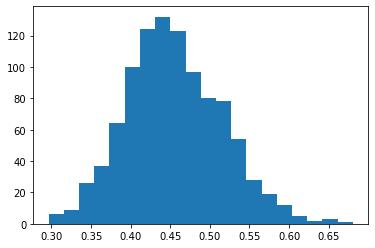

In [5]:
plt.hist(df.iloc[:, 0], bins=20)

(array([197., 265., 177., 103.,  80.,  51.,  33.,  30.,  24.,  10.,  12.,
          4.,   4.,   3.,   0.,   3.,   0.,   2.,   0.,   2.]),
 array([-0.018421813858354168, -0.007433250504009642, 0.003555312850334884,
        0.01454387620467941, 0.025532439559023935, 0.03652100291336846,
        0.04750956626771299, 0.058498129622057506, 0.06948669297640203,
        0.08047525633074656, 0.0914638196850911, 0.1024523830394356,
        0.11344094639378013, 0.12442950974812467, 0.13541807310246917,
        0.1464066364568137, 0.15739519981115824, 0.16838376316550277,
        0.1793723265198473, 0.1903608898741918, 0.20134945322853634],
       dtype=object),
 <BarContainer object of 20 artists>)

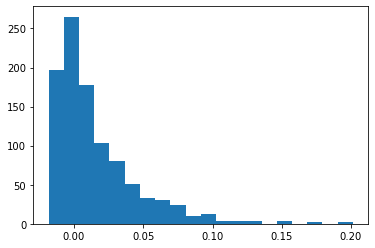

In [6]:
plt.hist(df.iloc[:, 1], bins=20)

(array([ 34., 135., 157., 181., 129., 112.,  78.,  49.,  36.,  26.,  25.,
         12.,   9.,   8.,   2.,   1.,   0.,   0.,   2.,   4.]),
 array([-0.01860633858473284, -0.014039937247029437, -0.009473535909326035,
        -0.004907134571622632, -0.0003407332339192305,
        0.004225668103784171, 0.008792069441487575, 0.013358470779190973,
        0.017924872116894378, 0.022491273454597782, 0.02705767479230118,
        0.031624076130004584, 0.03619047746770799, 0.04075687880541139,
        0.045323280143114784, 0.04988968148081819, 0.054456082818521594,
        0.059022484156225, 0.06358888549392841, 0.0681552868316318,
        0.07272168816933519], dtype=object),
 <BarContainer object of 20 artists>)

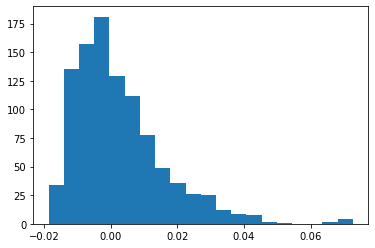

In [7]:
plt.hist(df.iloc[:, 2], bins=20)

(array([183., 323., 203., 127.,  75.,  34.,  23.,  15.,   7.,   2.,   3.,
          1.,   0.,   3.,   1.]),
 array([-0.017337018892778014, -0.007956968322987859,
        0.0014230822468022965, 0.010803132816592453, 0.020183183386382607,
        0.02956323395617276, 0.03894328452596292, 0.04832333509575307,
        0.05770338566554323, 0.06708343623533339, 0.07646348680512353,
        0.0858435373749137, 0.09522358794470386, 0.104603638514494,
        0.11398368908428415, 0.12336373965407431], dtype=object),
 <BarContainer object of 15 artists>)

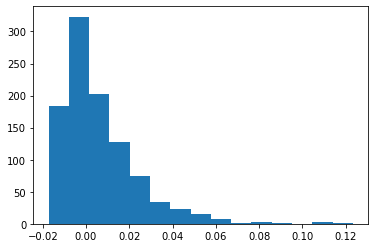

In [8]:
plt.hist(df.iloc[:, 3], bins=15)

(array([156., 415., 230., 100.,  43.,  27.,  11.,   7.,   2.,   2.,   3.,
          1.,   1.,   1.,   1.]),
 array([-0.02052941707771272, -0.009094188856134933, 0.0023410393654428527,
        0.013776267587020635, 0.025211495808598425, 0.036646724030176214,
        0.04808195225175399, 0.05951718047333178, 0.07095240869490957,
        0.08238763691648736, 0.09382286513806515, 0.10525809335964292,
        0.1166933215812207, 0.1281285498027985, 0.13956377802437628,
        0.15099900624595408], dtype=object),
 <BarContainer object of 15 artists>)

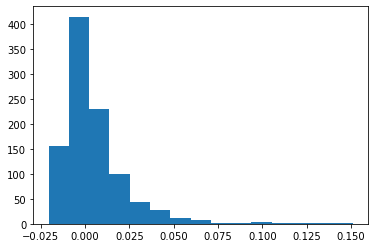

In [9]:
plt.hist(df.iloc[:, 4], bins=15)

In [10]:
import math
math.log2(10000) + 1

14.287712379549449

In [12]:
mc = MonteCarloResamplingOperator(shuffle_calculator)
mc.model

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_5280d05ade44a8da9edb5a6569d08f1f NOW.


CompileError: command 'gcc' terminated by signal 7

In [ ]:
%%time

items = df.iloc[:, 1]
item_size = len(items)
min_value = items.min()
items -= min_value
print(items)
print(items.min())
stan_data = {
    'N': item_size,
    'Y': items.values.tolist()
}

fit = mc.model.sampling(data=stan_data, iter=3000, chains=3, warmup=1000)

In [ ]:
plt.hist(items, bins=15)

In [ ]:
fit.plot()

In [ ]:
fit

In [ ]:
np.mean(fit.extract('mu')['mu']) + min_value

In [ ]:
result[1]

In [ ]:
result[2]

In [ ]:
TimeCorrelationViewer(*result).draw(title='A1postES 0-40s in %s' % animal_name)

In [ ]:
#resampling = mc.resampling(df)
#resampling

In [ ]:
#resampling.reshape(40, 40)